# Importing Libraries 

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# Loading Data set 

In [5]:
zappy_data = pd.read_excel("PDA - Zappy Loan Data.xlsx")

In [6]:
zappy_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


# Numerics used meanings 

In [22]:
# Gender: 1 - Male and 2 - Female 
# Married: 0 - Single and 1 - Married 
# Dependents: 0, 1, 2, 3+
# Graduate: 0 - No and 1 - Yes
# Self_employed: 0 - No and 1 - Yes
# credit_history: 0 - No and 1 - Yes
# property_area: 1 - Urban, 2 - Semiurban and 3 - Rural

# Data Preprocessing

In [7]:
zappy_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

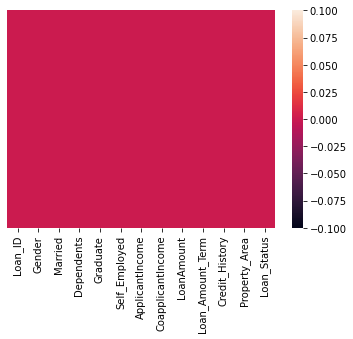

In [8]:
sns.heatmap(zappy_data.isnull(), yticklabels= False)

In [9]:
data = pd.get_dummies(zappy_data['Loan_Status'])

In [10]:
data.head()

,N,Y
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [11]:
zappy_data = pd.concat([zappy_data, data], axis = 1)

In [12]:
zappy_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y,0,1
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N,1,0
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N,1,0
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N,1,0
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y,0,1


# Exploratory Data Analysis 

In [13]:
# Percentage of loan approved for female applicants 

In [14]:
zappy_data['Gender'].value_counts()

1    198
2     49
Name: Gender, dtype: int64

In [15]:
female_applicants = zappy_data[zappy_data['Gender']==2]

In [16]:
female_applicants.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N,1,0
5,2300,2,0,0,0,0,1963,0.0,53,333,1,2,Y,0,1
6,2301,2,0,0,1,1,7441,0.0,194,333,1,3,N,1,0
7,2305,2,0,0,1,0,4547,0.0,115,333,1,2,Y,0,1
9,2314,2,0,0,0,0,2213,0.0,66,333,1,3,Y,0,1


In [17]:
female_applicants['Y'].value_counts()

1    33
0    16
Name: Y, dtype: int64

In [18]:
print('Percentage of loan approved for female applicants is ', (3300)/49)

Percentage of loan approved for female applicants is  67.34693877551021


In [19]:
# Average Income of all the applicants 

In [20]:
average_income = zappy_data['ApplicantIncome'].mean()

In [21]:
print('Average income of all the applicants is ', average_income)

Average income of all the applicants is  5403.688259109312


In [23]:
# Average income of the applicants that are self_employed

In [24]:
self_employed = zappy_data[zappy_data['Self_Employed']==1]

In [25]:
self_employed.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
6,2301,2,0,0,1,1,7441,0.0,194,333,1,3,N,1,0
16,1910,1,0,1,0,1,4053,2426.0,158,333,0,1,N,1,0
22,1925,2,0,0,1,1,2600,1717.0,99,300,1,2,N,1,0
43,2318,2,0,1,0,1,3867,0.0,62,333,1,2,N,1,0
50,2342,1,1,2,1,1,1600,20000.0,239,333,1,1,N,1,0


In [26]:
self_income_average = self_employed['ApplicantIncome'].mean()

In [27]:
print('Average income of the applicants who are self employed is ', self_income_average)

Average income of the applicants who are self employed is  7828.171428571429


In [28]:
# Average income of the applicants that are not self_employed

In [29]:
self_employed_not = zappy_data[zappy_data['Self_Employed']==0]

In [30]:
self_employed_not.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y,0,1
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N,1,0
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N,1,0
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N,1,0
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y,0,1


In [31]:
self_not_income_average = self_employed_not['ApplicantIncome'].mean()

In [32]:
print('Average income of all the applicants that are not self employed is ', self_not_income_average)

Average income of all the applicants that are not self employed is  5003.419811320755


In [33]:
# Average income of all the graduate applicants 

In [34]:
graduate_app = zappy_data[zappy_data['Graduate']==1]

In [35]:
graduate_app.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N,1,0
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y,0,1
6,2301,2,0,0,1,1,7441,0.0,194,333,1,3,N,1,0
7,2305,2,0,0,1,0,4547,0.0,115,333,1,2,Y,0,1
10,2315,1,1,1,1,0,8300,0.0,152,300,0,2,N,1,0


In [36]:
graduate_app_avg = graduate_app['ApplicantIncome'].mean()

In [38]:
print('Average income of the applicants who are graduate is ', graduate_app_avg)

Average income of the applicants who are graduate is  5925.342391304348


In [39]:
# Percentage of graduate applicants that had their loan status approved

In [40]:
graduate_app_appro = graduate_app[graduate_app['Y']==1]

In [41]:
graduate_app_appro.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y,0,1
7,2305,2,0,0,1,0,4547,0.0,115,333,1,2,Y,0,1
11,1900,1,1,1,1,0,2750,1842.0,115,333,1,2,Y,0,1
12,1903,1,1,0,1,0,3993,3274.0,207,333,1,2,Y,0,1
13,1904,1,1,0,1,0,3103,1300.0,80,333,1,1,Y,0,1


In [42]:
zappy_data['Graduate'].value_counts()

1    184
0     63
Name: Graduate, dtype: int64

In [44]:
graduate_app_appro.count()

Loan_ID              128
Gender               128
Married              128
Dependents           128
Graduate             128
Self_Employed        128
ApplicantIncome      128
CoapplicantIncome    128
LoanAmount           128
Loan_Amount_Term     128
Credit_History       128
Property_Area        128
Loan_Status          128
N                    128
Y                    128
dtype: int64

In [45]:
print('Percentage of graduate applicants who have their loan status approved is ', (12800)/184)

Percentage of graduate applicants who have their loan status approved is  69.56521739130434


# Machine Learning Model (Decesion Tree)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
zappy_data.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,N,Y
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y,0,1
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N,1,0
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N,1,0
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N,1,0
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y,0,1


In [53]:
x = zappy_data.iloc[:, 1:-3]

In [54]:
x

,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,3902,1666.0,109,333,1,3
1,0,0,1,0,1500,1800.0,103,333,0,2
2,1,2,0,0,2889,0.0,45,180,0,1
3,0,0,0,0,2755,0.0,65,300,1,3
4,0,0,1,0,2500,20000.0,103,333,1,2
...,...,...,...,...,...,...,...,...,...,...
242,0,0,1,0,2900,0.0,71,333,1,3
243,1,3,1,0,4106,0.0,40,180,1,3
244,1,1,1,0,8072,240.0,253,333,1,1
245,1,2,1,0,7583,0.0,187,333,1,1


In [57]:
y = zappy_data.iloc[:, -1]

In [59]:
y

0      1
1      0
2      0
3      0
4      1
      ..
242    1
243    1
244    1
245    1
246    0
Name: Y, Length: 247, dtype: uint8

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
from sklearn import tree

In [63]:
clf = DecisionTreeClassifier()

In [65]:
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
y_pred = clf.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score, classification_report

In [69]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.56      0.60        27\n           1       0.77      0.83      0.80        48\n\n    accuracy                           0.73        75\n   macro avg       0.71      0.69      0.70        75\nweighted avg       0.73      0.73      0.73        75\n'

In [70]:
accuracy_score(y_test, y_pred)

0.7333333333333333

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
confusion_matrix(y_test, y_pred)

array([[15, 12],
       [ 8, 40]], dtype=int64)

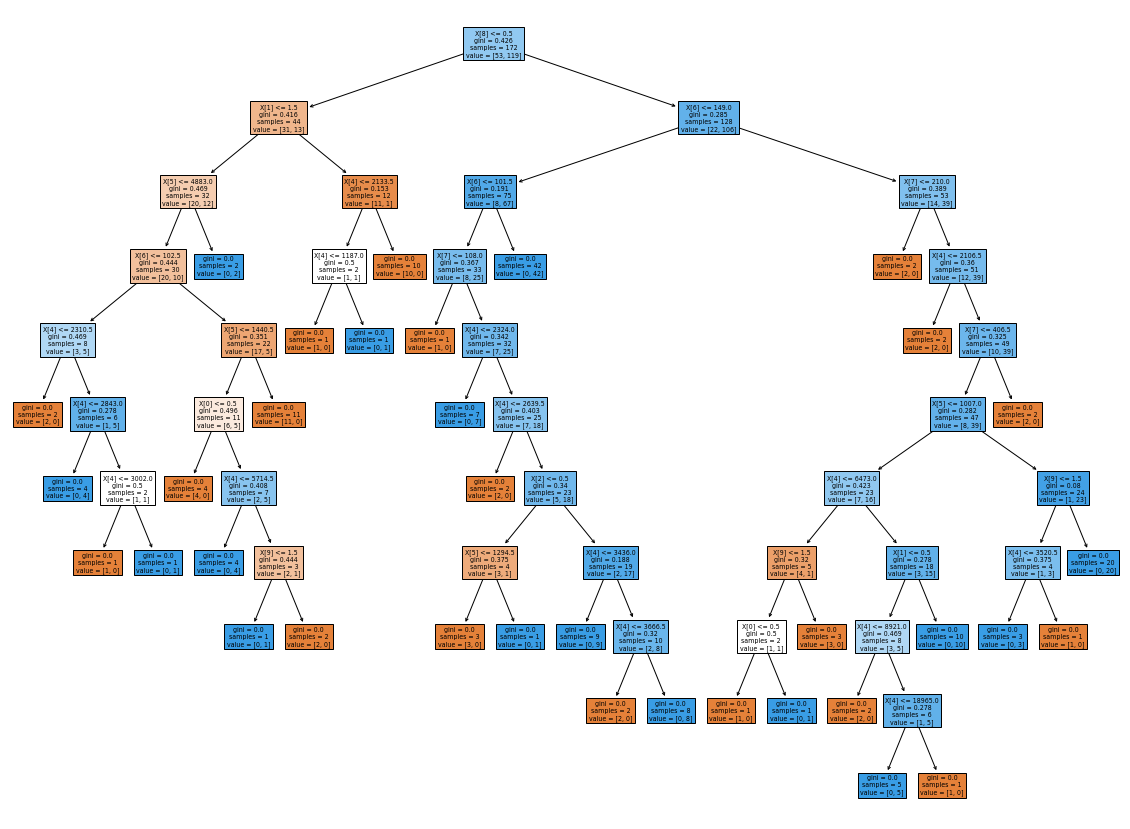

In [76]:
plt.figure(figsize=(20,15))
tree.plot_tree(clf, filled = True)
plt.show()